# Assignment 1 - Anomaly Detection - Bank Fraud
You are given a dataset of bank transactions, some of which have been marked as fraud. It is up to you to train, validate and test an anomaly detection algorithm to automatically detect fraudulent transactions. By working through this notebook you can obtain up to 10 points, which will result in your final grade.

## Assignment submission
To submit this assignment, you will have to
- Submit a prediction for the `test` dataset to the https://security.eemcs.utwente.nl server.
- Upload the final version of your notebook (including the outputs) to Canvas.

### Server submission
On the https://security.eemcs.utwente.nl server, you will need to register an account if you haven't done so already. If you run into issues with registering an account, please contact the teacher of the course.

Navigate to `Challenges` -> `Cyber Data Analytics` -> `Assignment 1 - Anomaly Detection`. Here you can start the docker conainer that will spin up the server that is required to answer question 10 of this assignment.

## Libraries
You will need the following Python libraries for this assignment:
- [matplotlib](https://matplotlib.org/)
- [numpy](https://numpy.org)
- [pandas](https://pandas.pydata.org/)
- [scikit-learn](https://scikit-learn.org/stable/index.html)

In [2]:
# This installs the mentioned libraries using pip, on some systems pip3 should be replaced by pip
!pip3 install matplotlib numpy pandas scikit-learn

error: externally-managed-environment

× This environment is externally managed
╰─> To install Python packages system-wide, try brew install
    xyz, where xyz is the package you are trying to
    install.
    
    If you wish to install a Python library that isn't in Homebrew,
    use a virtual environment:
    
    python3 -m venv path/to/venv
    source path/to/venv/bin/activate
    python3 -m pip install xyz
    
    If you wish to install a Python application that isn't in Homebrew,
    it may be easiest to use 'pipx install xyz', which will manage a
    virtual environment for you. You can install pipx with
    
    brew install pipx
    
    You may restore the old behavior of pip by passing
    the '--break-system-packages' flag to pip, or by adding
    'break-system-packages = true' to your pip.conf file. The latter
    will permanently disable this error.
    
    If you disable this error, we STRONGLY recommend that you additionally
    pass the '--user' flag to pip, or set 

## Load the data
**Question 1. [0.5pts]** Load the train and test data from `data/train.csv` and `data/test.csv` into a pandas dataframe.

In [3]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load data
dataTrain = pd.read_csv("data/train.csv")

# Load data
dataTest = pd.read_csv("data/test.csv")

In [4]:
dataTrain

,Id,issuercountrycode,txvariantcode,bin,amount,currencycode,shoppercountrycode,shopperinteraction,cardverificationcodesupplied,cvcresponsecode,accountcode,mail_id,ip_id,card_id,label
0,103901,AU,mccredit,517969.0,1000.0,AUD,AU,Ecommerce,True,0,APACAccount,email21099,ip31260,card182682,1
1,210427,GB,visadebit,465944.0,4815.0,GBP,GB,Ecommerce,True,1,UKAccount,email52090,ip314584,card151253,1
2,112529,GB,visadebit,454313.0,14495.0,GBP,GB,Ecommerce,True,1,UKAccount,email207206,ip51528,card47990,1
3,208878,AU,mccredit,516361.0,11000.0,AUD,AU,Ecommerce,True,0,APACAccount,email284873,ip114386,card95641,1
4,28936,GB,mccredit,542011.0,6090.0,GBP,GB,Ecommerce,True,1,UKAccount,email280026,ip324201,card74707,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132651,213663,MX,visaclassic,420199.0,189900.0,MXN,MX,Ecommerce,True,0,MexicoAccount,email85714,ip84052,card195152,-1
132652,34983,MX,visagold,493173.0,119900.0,MXN,MX,Ecommerce,True,0,MexicoAccount,email92697,ip76878,card264612,-1
132653,104804,AU,visabusiness,456480.0,54000.0,AUD,AU,Ecommerce,True,0,APACAccount,email68683,ip114901,card214574,-1
132654,60748,MX,visaclassic,477291.0,329900.0,MXN,MX,Ecommerce,True,0,MexicoAccount,email55291,ip68304,card37090,-1


## Data exploration
**Question 2. [1pt]** If you look carefully, some of the items in the dataset are missing or null. In these cases you can do two things:
1. Values can be replaced by dummy data. Here you have to take into account the difference between numerical and catagorical data. This also alters the dataset, making it potentially more difficult to train an algorithm.
2. Samples containing missing values can be removed from the data. This gives you less information to train on, moreover you can never remove samples from a test dataset as this would skew your results.

Choose and implement a way to deal with missing data in both the train and test dataset.

In [5]:
# The teacher says that replacing values by dummy data is more preferably
# and then checking the data by yourself to see if the values makes sense.

# Check if there is any null value in the dataset
# print(dataTest[dataTest['issuercountrycode'].isna()])


# I want to change the NaN values in 'issuercountrycode' by their 'shoppercountrycode', because those values are mostly the same throughout the dataset
dataTrain['issuercountrycode'].fillna(dataTrain['shoppercountrycode'], inplace=True)
dataTrain['shoppercountrycode'].fillna(dataTrain['issuercountrycode'], inplace=True)
dataTrain['cardverificationcodesupplied'].ffill(inplace=True) # or notnull()

dataTest['issuercountrycode'].fillna(dataTest['shoppercountrycode'], inplace=True)
dataTest['shoppercountrycode'].fillna(dataTest['issuercountrycode'], inplace=True)
dataTest['cardverificationcodesupplied'].ffill(inplace=True) # or notnull()

Explore the features (columns) and values of the provided data to get a feeling for the data. Identify which features are numerical, and which are catagorical. 

**Question 3. [1pt]** Create a histogram for one numerical feature and a bar plot for one catagorical feature for the training set to compare the difference between normal and anomalous traffic. You can use these plots to visualise which features may be needed to perform anomaly detection.

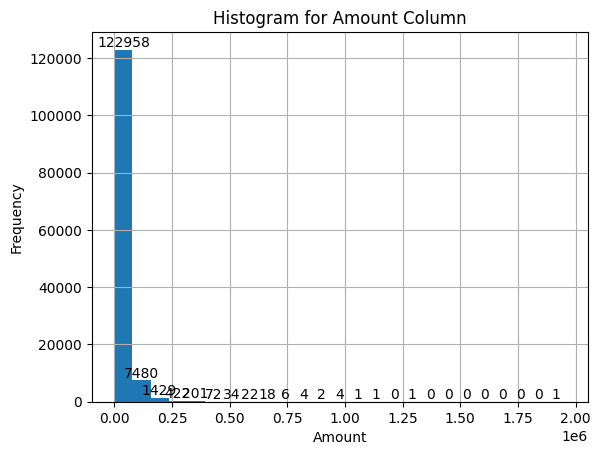

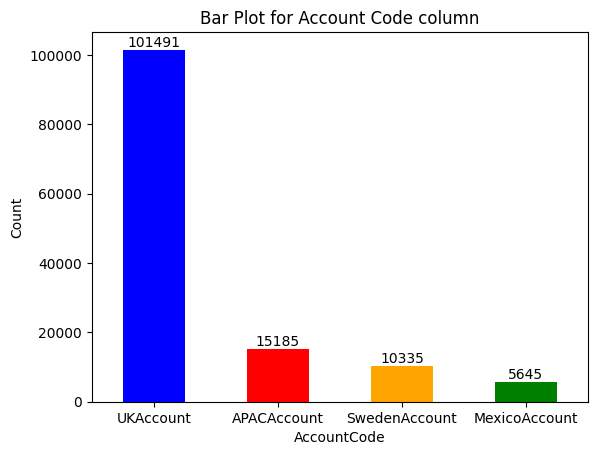

In [6]:
# I'm thinking for the histogram to plot the amount and for the bar plot the isusercountrycode
# Bin is Bank Identification Number
# but we can try every different value to see which is more valueble. 
# AccountCode and Amount is one I've heard around me

# Plotting Histogram for the 'Account' column 
hist = dataTrain['amount'].hist(bins=25) 

# Annotate the values on the bars
for p in hist.patches:
    plt.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

  
# Adding title and labels 
plt.title('Histogram for Amount Column') 
plt.xlabel('Amount') 
plt.ylabel('Frequency') 
  
# Display the histogram 
plt.show() 

bar = dataTrain['accountcode'].value_counts().plot(kind='bar', title='Bar Plot for Account Code column', xlabel='AccountCode', ylabel='Count', rot=0, color=['blue', 'red', 'orange', 'green'])
# Annotate the values on the bars
for p in bar.patches:
    bar.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.show()

## Feature selection
Look at the features in the dataset, which features do you think are useful? Which features will definitely not be useful? Which features are you not sure of? 

At the very least, we cannot use the `label` as a feature, as this would immediately reveal which samples are anomalous. Moreover, this feature is missing in the `test` dataset, meaning that we could not use it in the first place. Therefore, we will split the data (often refered to in code as `X`) and label (often refered to in code as `y`).

**Question 4a. [0.5pts]** Split the datasets into the training data (`X_train`), training label (`y_train`) and test data (`X_test`).

**Question 4b. [0pts]** Next, remove the features in both the train and test data for which you are sure they will not be useful. Keep all other features. If you think all features are important, you can skip this part. Make sure you keep at least 1 catagorical feature for the next question.

In [9]:
# Import
from sklearn.model_selection import train_test_split

# The BIN I think is not important, so we remove those.
dataTrain.drop(columns=['bin'])
dataTest.drop(columns=['bin'])

# Split the dataset into training data, training label and test data
X = dataTrain.drop(columns=['label'])
y = dataTrain['label']

X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)


ValueError: too many values to unpack (expected 3)

## One-hot encoding
**Question 5a. [1pt]** One-hot encode the remaining catagorical features and replace the original values with their one-hot encoded counterparts.

In [ ]:
# geen scikit learn/ use pandas

**Question 5b. [0pts]** If you haven't done so already, transform your `X_train`, `y_train` and `X_test` data, including the one-hot-encoded values into numpy arrays where the rows represent the samples, and the columns represent the features.

## Feature scaling
Use the following function to plot the features before and after scaling (see next question). You can observe that scaling improves separation between values, making it easier to find anomalies.

**Note:** Because PCA is used to downscale features to two dimensions, some information will be lost. This means that in some cases, overlapping datapoints may still be distinguished in their original form.

In [ ]:
from sklearn.decomposition import PCA

def plot_pca(X, y):
    # Reduce features to two dimensions
    X = PCA(2).fit_transform(X)
    # Scatter features
    plt.scatter(X[:, 0][y ==  1], X[:, 1][y ==  1])
    plt.scatter(X[:, 0][y == -1], X[:, 1][y == -1])
    plt.show()

plot_pca(X_train, y_train)

**Question 6. [1pt]** Scale the given features from 0-1 using Min-Max Scaling.

Use the `plot_pca()` function to plot the newly scaled features. Do the datapoints seem easier to separate?

**Note:** Because PCA is used to downscale features to two dimensions, some information will be lost. This means that in some cases, overlapping datapoints may still be distinguished in their original form.

In [ ]:
plot_pca(X_train, y_train)

## Train-test-validate split
The data is already split into a train and test set. However, the test set does not contain any labels. Therefore, to measure the expected performance, we can subdivide the training set into a training (`X_train`, `y_train`) and validation set (`X_validate`, `y_validate`).

**Question 7. [1pt]** Split the training data into a train and validation set.

## Anomaly detection
Now that we have preprocessed and split the dataset, we can train an anomaly detection algorithm.

**Question 8 [1pt].** Choose an anomaly detection algorithm, fit it with the training data and use it to predict the validation data.

## Evaluate
**Question 9 [1pt].** Evaluate your model. Compute the precision, recall and F1-score to see how well it performs.

## Optimization(Optional)
Go back and optimize your feature selection, anomaly detection approach, play around with different model parameters or perform other changes to obtain a better performance.

## Testing
**Question 10. [2pts]**
Test your model by predicting the values for the test dataset and submitting them to the server for review. You can start the server at https://security.eemcs.utwente.nl > `Challenges` > `Cyber Data Analytics` > `Assignment 1 - Anomaly Detection`. Use the address of the docker container as `http://<address>` for the `url` parameter in the submit function.

You can obtain a grade of 8 by completing the first 9 questions of the notebook, if you wish to improve your grade further, we use the following requirements:

| Requirement                                          | Reward      |
|------------------------------------------------------|-------------|
| anomalous (-1) precision > 0.3                       | +0.5 points |
| anomalous (-1) recall > 0.9                          | +0.5 points |
| macro avg precision > 0.5                            | +0.5 points |
| macro avg recall > 0.8                               | +0.5 points |
| macro avg precision > 0.5 and macro avg recall > 0.8 | Flag        |

**Note:** The server is rate-limited and may take a few seconds to process your request.

In [ ]:
import requests

def submit(url: str, y_pred: list[int]):
    print(requests.post(url, json={'y_pred': y_pred.tolist()}).text)

# Change the <port> with the value you receive after starting the docker container at security.eemcs.utwente.nl
submit(
    url = 'http://security.eemcs.utwente.nl:<port>',
    y_pred = model.predict(X_test),
)

# Submission
Upload the final version of the notebook, **including the output showing your Testing performance** to Canvas.